## Global Settings and Imports

In [2]:
# jupyter notebook에서 import 해서 쓰는 모듈의 코드가 변경될 시, 변동 사항을 자동으로 반영해주는 기능 켜기
%load_ext autoreload
%autoreload 2

In [ ]:
from test_manager import TestManager, TestArgs

## Prepare parameters

In [2]:
args = TestArgs(
    config = "config/model/sentirec/vader_manual1.yaml",
    ckpt = "logs/lightning_logs/checkpoints/sentirec/vader_manual1/epoch=12-val_auc_epoch=0.8667-v3.ckpt"
)

## 1. 원클릭 테스트

In [ ]:
# TestManager 생성
# 해당 클래스는 args를 인자로 받으면 __init__() 함수에서
# test 시작 전에 해야하는 모든 세팅을 알아서 진행함
test_manager = TestManager(args)

Seed set to 1234
100%|██████████| 3246/3246 [00:00<00:00, 19486.08it/s]
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


In [ ]:
# 불러온 모델 평가 시작
# 해당 함수는 학습에 필요한 변수들이 인스턴스 내부에 미리 정의되어 있어야 함
test_manager.test()

## 2. 좀 더 자세히 보기

## Load data

In [ ]:
# load configs
config = test_manager.load_model_config(args)
logger = test_manager.create_logger(config)

# load data
test_dataset, test_loader = test_manager.create_dataloader(config)

# load embedding pre-trained embedding weights
pretrained_word_embedding = test_manager.load_embedding_weights(config)

100%|██████████| 1/1 [00:00<00:00, 1000.07it/s]


## Load model from checkpoint

In [ ]:
print(config.name)
model = test_manager.load_model_from_checkpoint(args, config, pretrained_word_embedding)

sentirec


## Test model

In [ ]:
trainer = test_manager.create_trainer(config, logger)

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


In [ ]:
test_result = test_manager.start_test(trainer, model, test_loader)

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
c:\Users\USER\anaconda3\envs\newsrec\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:425: The 'test_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=11` in the `DataLoader` to improve performance.


Testing: |          | 0/? [00:00<?, ?it/s]

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
         Test metric                 DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       test_auc_epoch             0.7777777910232544
test_ils_senti@10_bert_epoch      0.43403464555740356
test_ils_senti@10_vader_epoch     0.22488000988960266
 test_ils_senti@5_bert_epoch      0.5201636552810669
test_ils_senti@5_vader_epoch      0.16557000577449799
   test_ils_topic@10_epoch        0.08888886123895645
   test_ils_topic@5_epoch                 0.0
       test_mrr_epoch             0.3333333432674408
     test_ndcg@10_epoch                   0.5
      test_ndcg@5_epoch                   0.5
  test_senti@10_bert_epoch        0.11298489570617676
  test_senti@10_vader_epoch               0.0
   test_senti@5_bert_epoch       0.045690715312957764
  test_senti@5_vader_epoch      0.0002049

## 기타 실험용 코드

In [ ]:
test_dataset[0]

In [28]:
test_dataset[0]['h_title'].max()

tensor(3240)

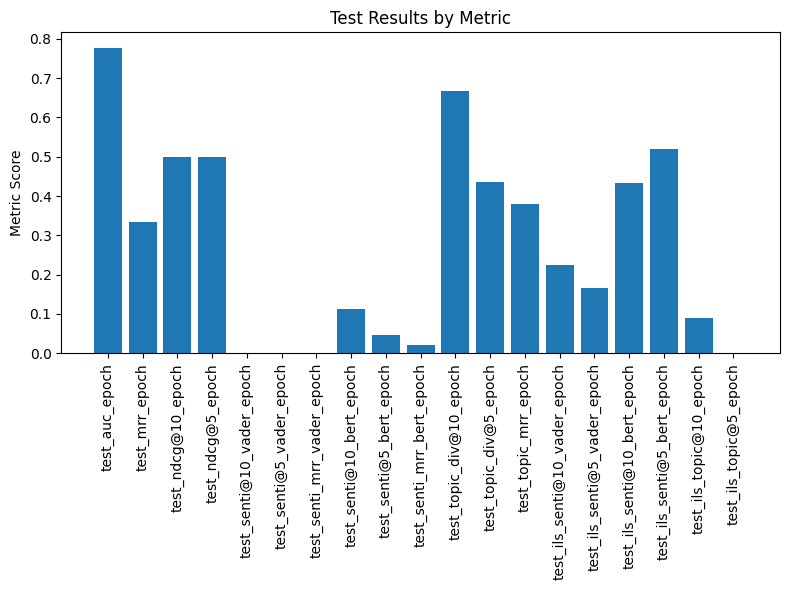

In [12]:
# 간단한 시각화
import matplotlib.pyplot as plt

metrics = test_result[0]
keys = metrics.keys()
values = metrics.values()

# 그림 크기 설정
plt.figure(figsize=(8, 6))

# 막대 그래프
plt.bar(keys, values)

# 레이블 회전 + 정렬
plt.xticks(rotation=90)
plt.ylabel("Metric Score")
plt.title("Test Results by Metric")

# 레이아웃 깔끔하게
plt.tight_layout()

# 출력
plt.show()